In [1]:
# Generate random input data.
using Random
using Distributions
Random.seed!(1234)

function genData(sample_per_class)
    μs = [-1., 0.5, 2.5]
    σs = [0.5, 1., 1.5]

    xs::Array{Array{Float64},1} = []
    for (μ, σ) in zip(μs, σs)
        push!(xs, rand!(Normal(μ, σ), zeros(sample_per_class, 3))) 
    end

    return vcat(xs...)
end

class_num = 3
sample_per_class = 20
data = genData(sample_per_class);

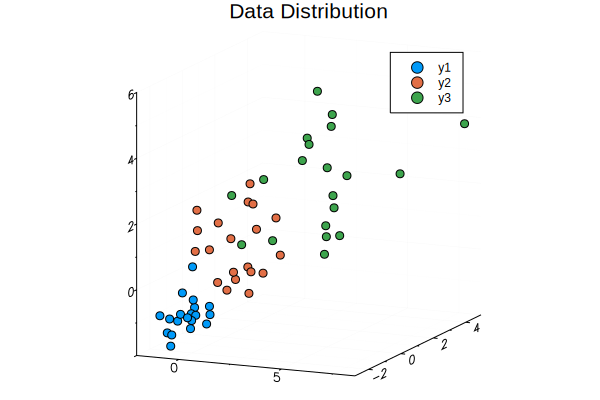

In [2]:
# Plot input data
using Plots; gr()

function plotData(data, class_num, sample_per_class, title)
    sp = 1
    ep = sample_per_class
    sliced = view(data[sp : ep, :], :, :)
    scatter(sliced[:, 1], sliced[:, 2], sliced[:, 3])
    
    for _ = 2 : class_num
        sp = ep + 1
        ep += sample_per_class
        
        sliced = view(data[sp : ep, :], :, :)     
        s = scatter!(sliced[:, 1], sliced[:, 2], sliced[:, 3])
    end
    title!(title)
end

plotData(data, class_num, sample_per_class, "Data Distribution")

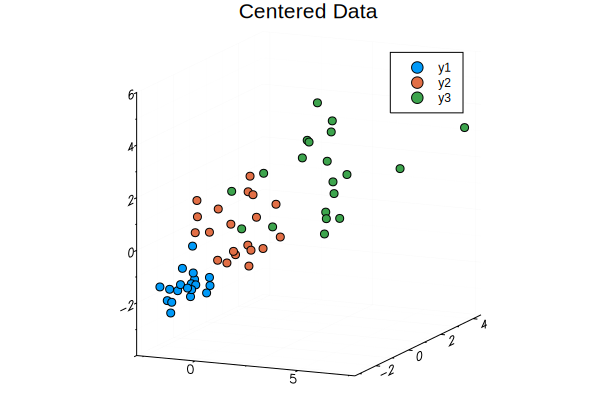

In [3]:
using Statistics

function centered(data)
    m = mean(data, dims=1)
    centered = similar(data)
    
    start = 1
    for pos in sample_per_class : sample_per_class : sample_per_class * class_num
        centered[start : pos, :] = view(data[start:pos, :], :, :) .- m
        start = pos + 1
    end
    return centered
end

# Step 1: flatten and center the original data.
c = centered(data)
plotData(c, class_num, sample_per_class, "Centered Data")

In [4]:
# Step2: Eigen vectors and Eigen values of the convariance matrix.
using LinearAlgebra
F = eigen(cov(data))

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
eigenvalues:
3-element Array{Float64,1}:
 0.9679783173569608
 1.260641655480362 
 8.277244298912596 
eigenvectors:
3×3 Array{Float64,2}:
 -0.121606   0.731125  -0.671318
 -0.635194  -0.577035  -0.51338 
  0.762719  -0.363987  -0.534577

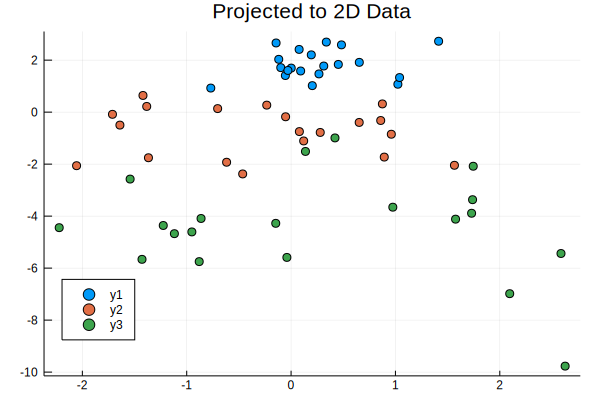

In [6]:
# Step 3: project data into a new space.
sorted_idx = sort(hcat(F.values, 1 : length(F.values)), dims=1, by=x -> x[1], rev=true)[:,2]
w = [F.vectors[Int(sorted_idx[1]), :]'; F.vectors[Int(sorted_idx[2]), :]']

projected = []
start = 1
for pos in sample_per_class : sample_per_class : sample_per_class * class_num
    push!(projected, view(data[start:pos, :], :, :) * w')
    start = pos + 1
end

s1 = scatter(projected[1][:, 1], projected[1][:, 2])
s2 = scatter!(projected[2][:, 1], projected[2][:, 2])
s3 = scatter!(projected[3][:, 1], projected[3][:, 2])
plot!(legend=:bottomleft)

title!("Projected to 2D Data")